# Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/


## Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. 3-32 Ten real-valued features are computed for each cell nucleus:

    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension ("coastline approximation" - 1)

![](https://static.packt-cdn.com/products/9781783980284/graphics/3a298fcc-54fb-42c2-a212-52823e709e30.png)

# import libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [4]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# load and analyze data

In [5]:
train = pd.read_csv('./drive/MyDrive/CS_184a/Final_Project/data.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### like we see all our feautres are numirical values exept the target value ***diagnosis*** (M = malignant, B = benign)

In [6]:
train.shape

(569, 33)

##### we had 569 Rows and 33 columns (small data )

In [7]:
train.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


#### from the first look in our data description we can see that :

1. B = benign is the most frequent value in our target columns
2. Unnamed: 32 columns is an empty column

## finding missing values

In [8]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


##### like we c our data is clean exept the last columns that is empty so we gonna drop it

In [9]:
train=train.drop('Unnamed: 32',axis=1)
train=train.drop('id',axis=1)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#features selection

In [11]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# transformation of type of the target value to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.diagnosis = le.fit_transform(train.diagnosis)
train.diagnosis


,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


#### Diagnosis

1. M = malignant ==> 1
2. B = benign    ==> 0

# correlation map

[0.06108266 0.02585254 0.09235433 0.054952   0.00913237 0.03395155
 0.05331042 0.07518987 0.00817574 0.006973   0.03851912 0.00622296
 0.0215479  0.02505235 0.00642472 0.00754854 0.01502216 0.01277542
 0.00535995 0.00570822 0.06704167 0.03108788 0.06476816 0.07160304
 0.02198642 0.03638801 0.04583238 0.06888313 0.01461848 0.01263503]


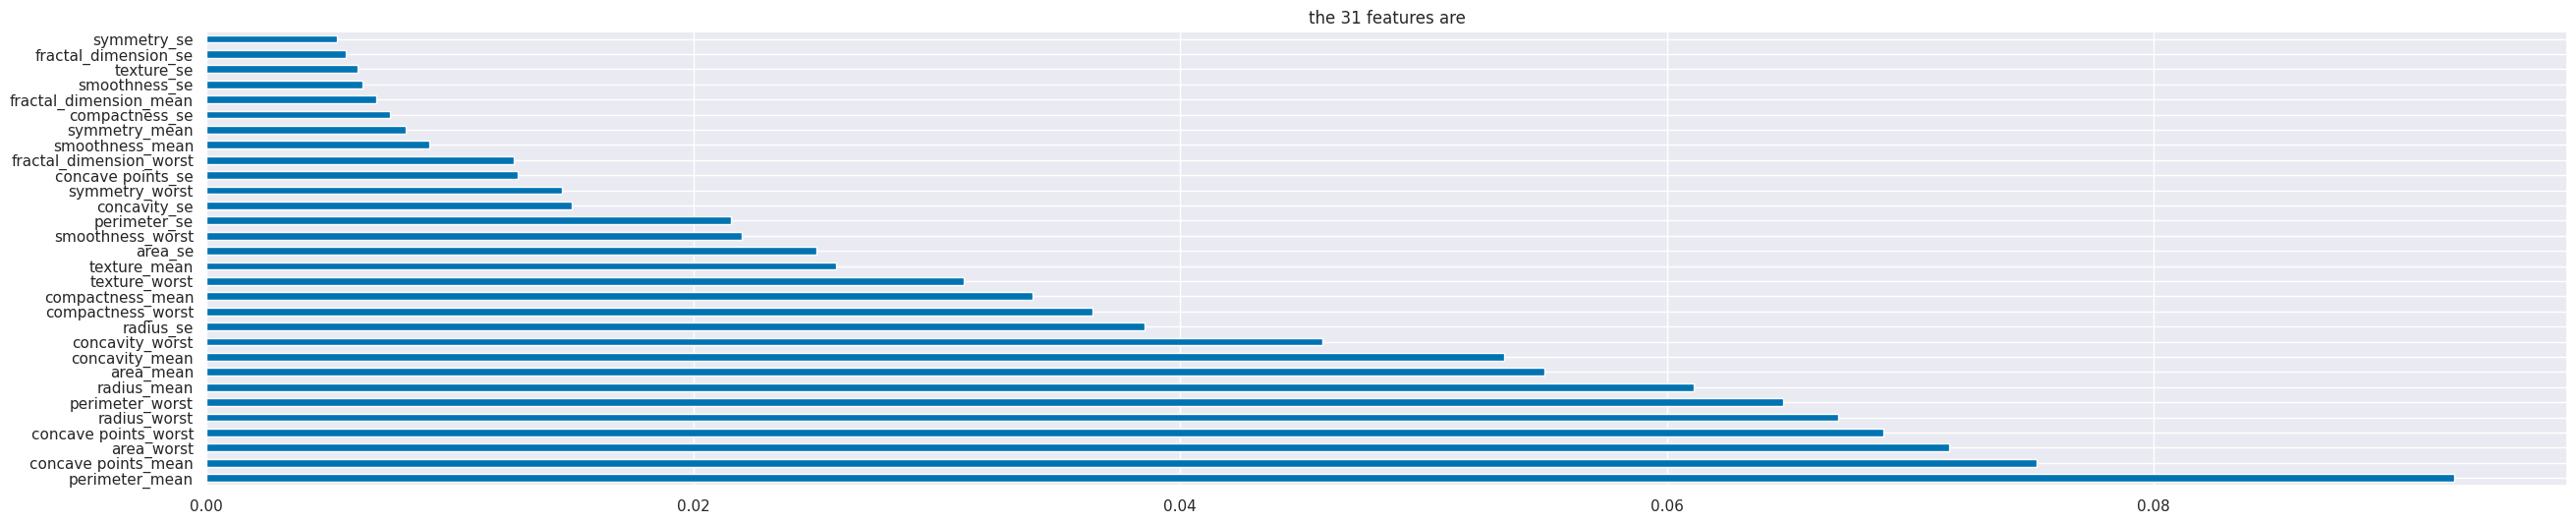

In [13]:
# Feature Selection

plt.rcParams['figure.figsize']=31,6
sns.set_style("darkgrid")

x = train.drop('diagnosis',axis=1)
y = train.diagnosis

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(31).plot(kind='barh')
plt.title('the 31 features are')
plt.show()

In [14]:
train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#data vizualisation

##diagnosis

<ipython-input-15-c333dd5ab9b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train.diagnosis , palette = "rocket", saturation =1.5)


Text(0.5, 1.0, 'Number of diagnosis ')

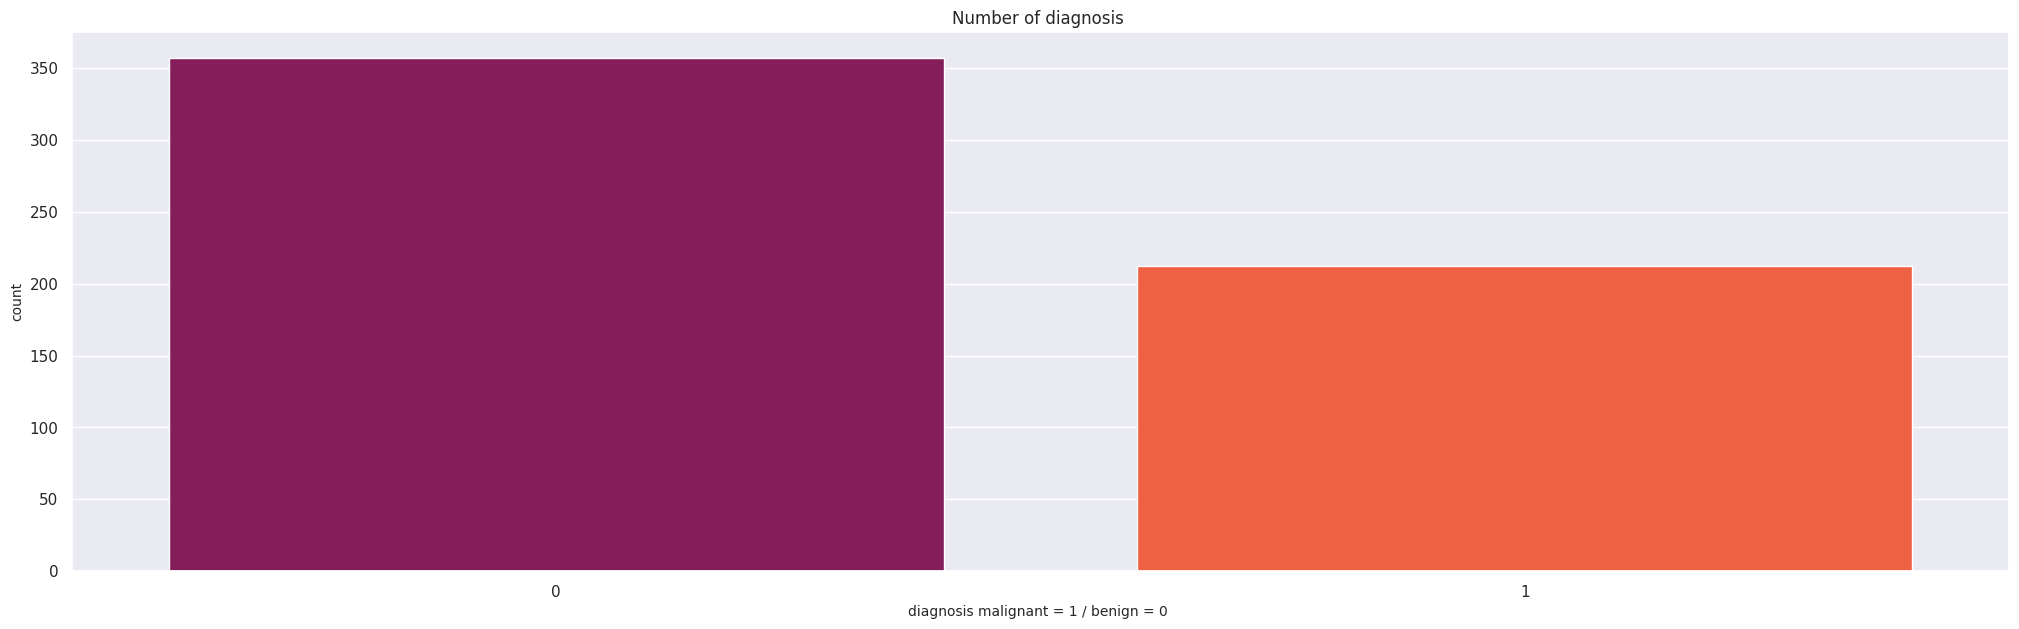

In [15]:
plt.rcParams['figure.figsize']=25,7
sns.set_style("darkgrid")
ax = sns.countplot(x=train.diagnosis , palette = "rocket", saturation =1.5)
plt.xlabel("diagnosis malignant = 1 / benign = 0 ", fontsize = 10 )
plt.ylabel("count", fontsize = 10)
plt.title('Number of diagnosis ')

## split data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [17]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [18]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# kNN

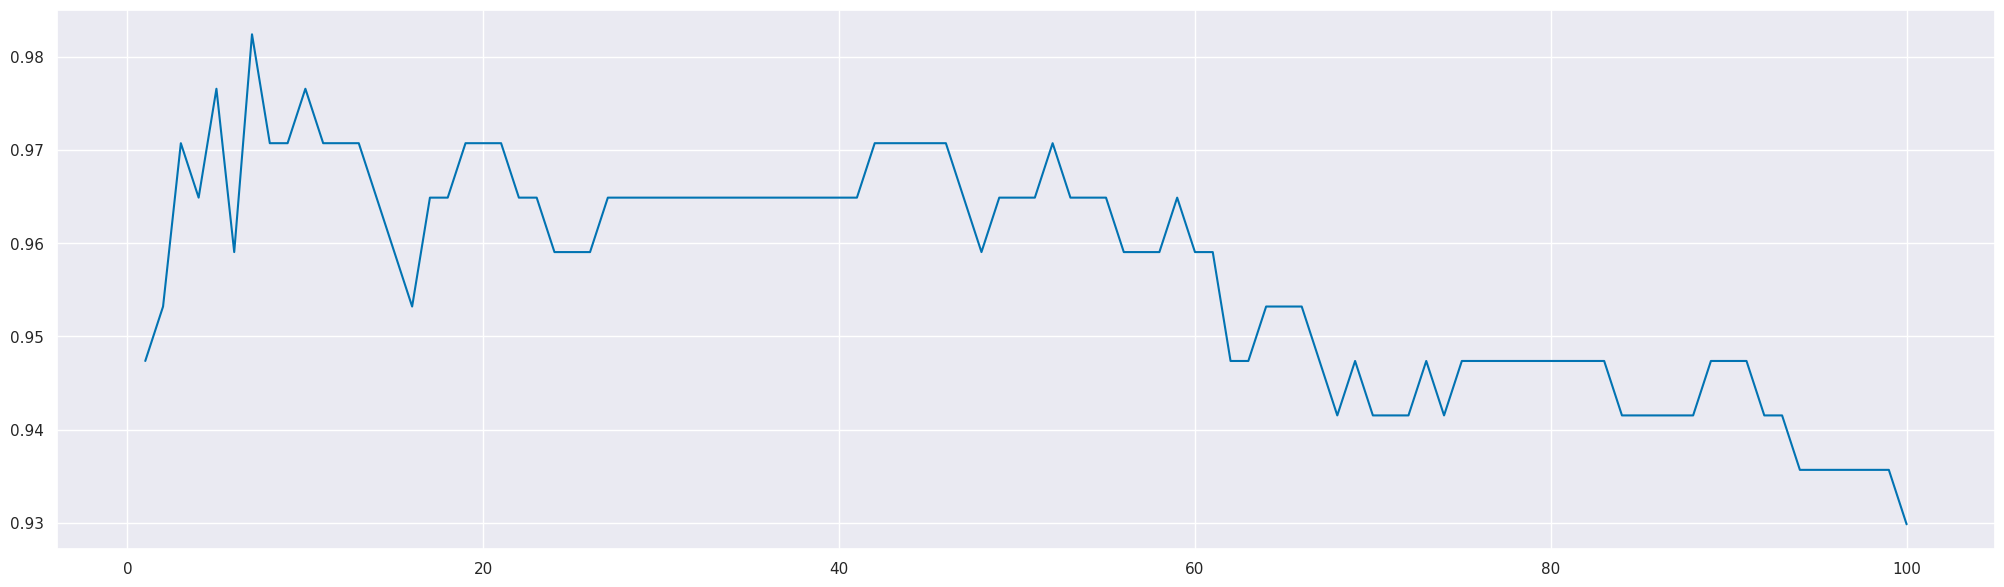

In [21]:
# Finding the optimum number of neighbors

mylist = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,101)), list1)
plt.show()

In [22]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)



[0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0]


In [23]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[111   2]
 [  3  55]]
0.9707602339181286


# CNN

In [24]:
!pip install tensorflow

In [74]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [75]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [80]:
x_train.shape, y_test.shape

((398, 30), (171,))

In [81]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
x_train = x_train.reshape(398,30,1)
x_test = x_test.reshape(171,30,1)

In [83]:
def create_model():
  model = Sequential()
  model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(30, 1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv1D(32, 2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [84]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 29, 16)              │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 29, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 29, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 28, 32)              │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │          28,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,033 (117.32 KB)

 Trainable params: 29,937 (116.94 KB)

 Non-trainable params: 96 (384.00 B)

In [86]:
history = model.fit(x_train, y_train, epochs=35, verbose=1, validation_data=(x_test, y_test))

Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5225 - loss: 0.8059 - val_accuracy: 0.7310 - val_loss: 0.6662
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7189 - loss: 0.5483 - val_accuracy: 0.8713 - val_loss: 0.6261
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8427 - loss: 0.3729 - val_accuracy: 0.8480 - val_loss: 0.5908
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8416 - loss: 0.3438 - val_accuracy: 0.8713 - val_loss: 0.5575
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9272 - loss: 0.2667 - val_accuracy: 0.8772 - val_loss: 0.5258
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9072 - loss: 0.2531 - val_accuracy: 0.9123 - val_loss: 0.4948
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9000 - loss: 0.2222 - val_accuracy: 0.9181 - val_loss: 0.4654
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9199 - loss: 0.1878 - val_accuracy: 0.9123 - val

In [87]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
acc_cnn = accuracy_score(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)
print(acc_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Confusion Matrix:
[[105   1]
 [  4  61]]
0.9707602339181286


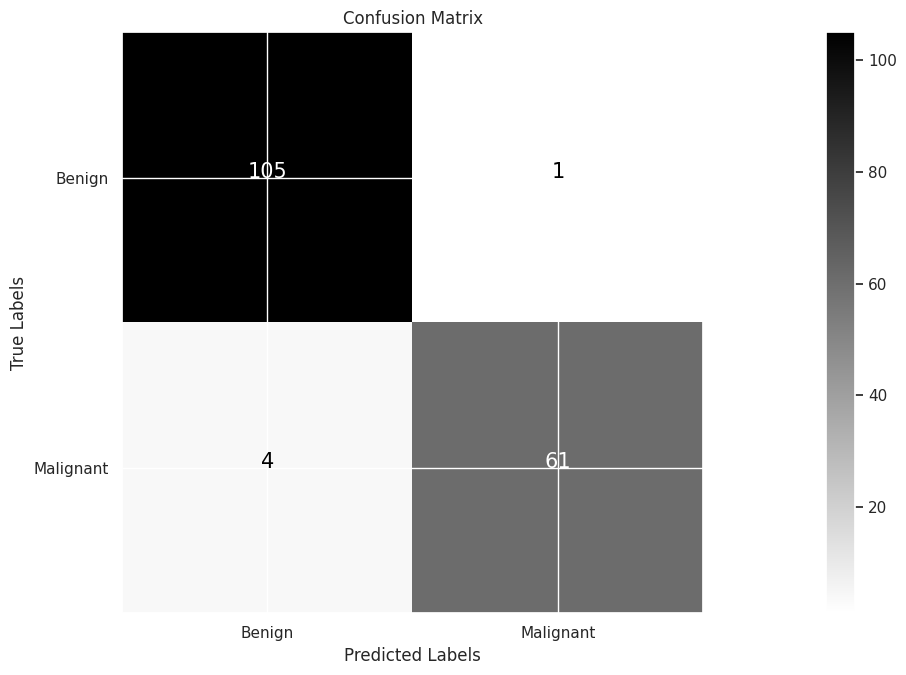

In [88]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.imshow(cm, cmap='binary', interpolation='None')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.colorbar()

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [89]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

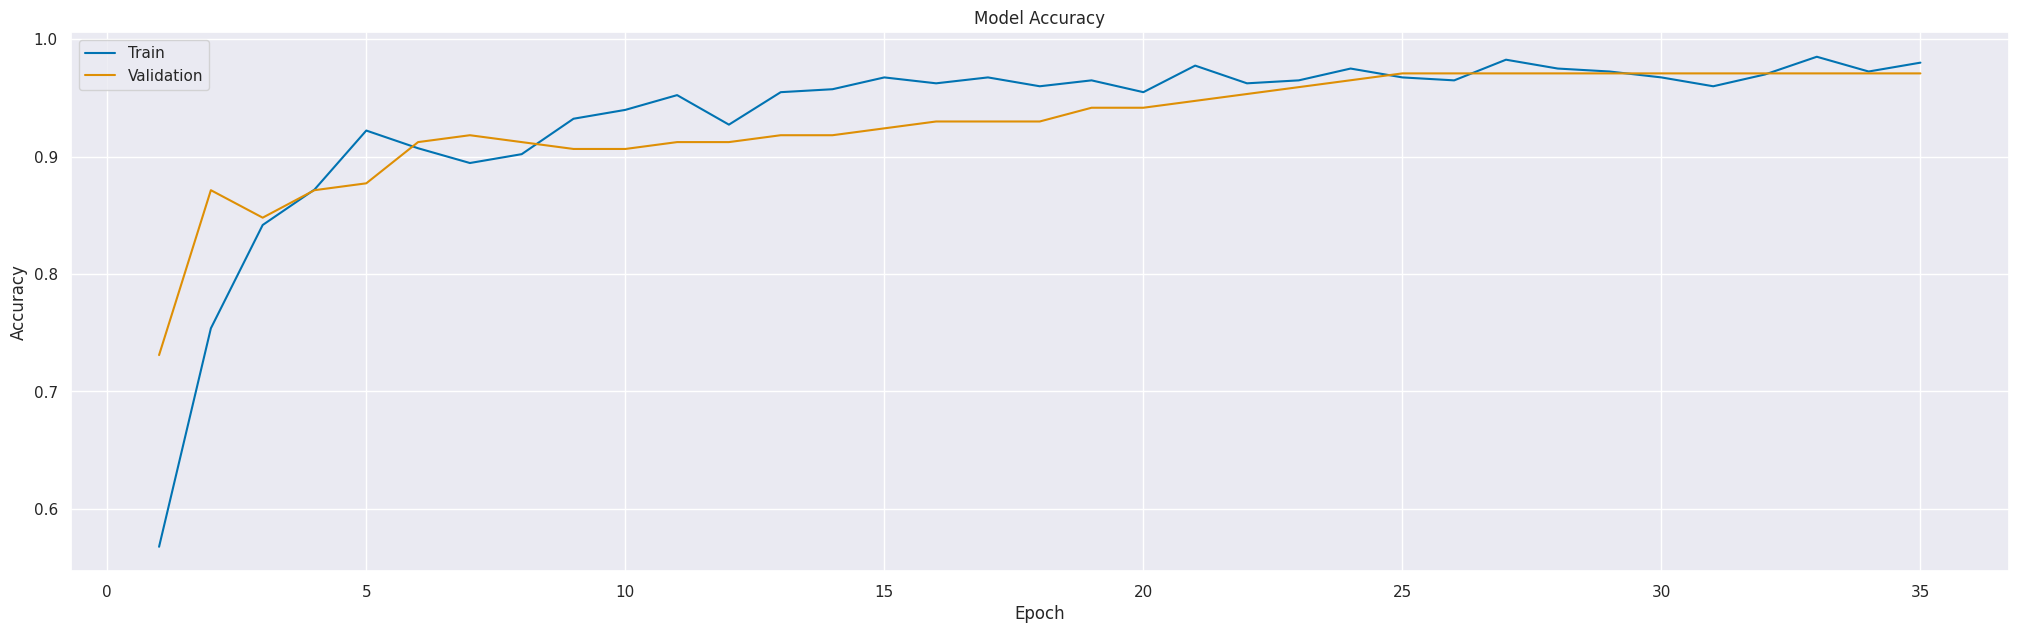

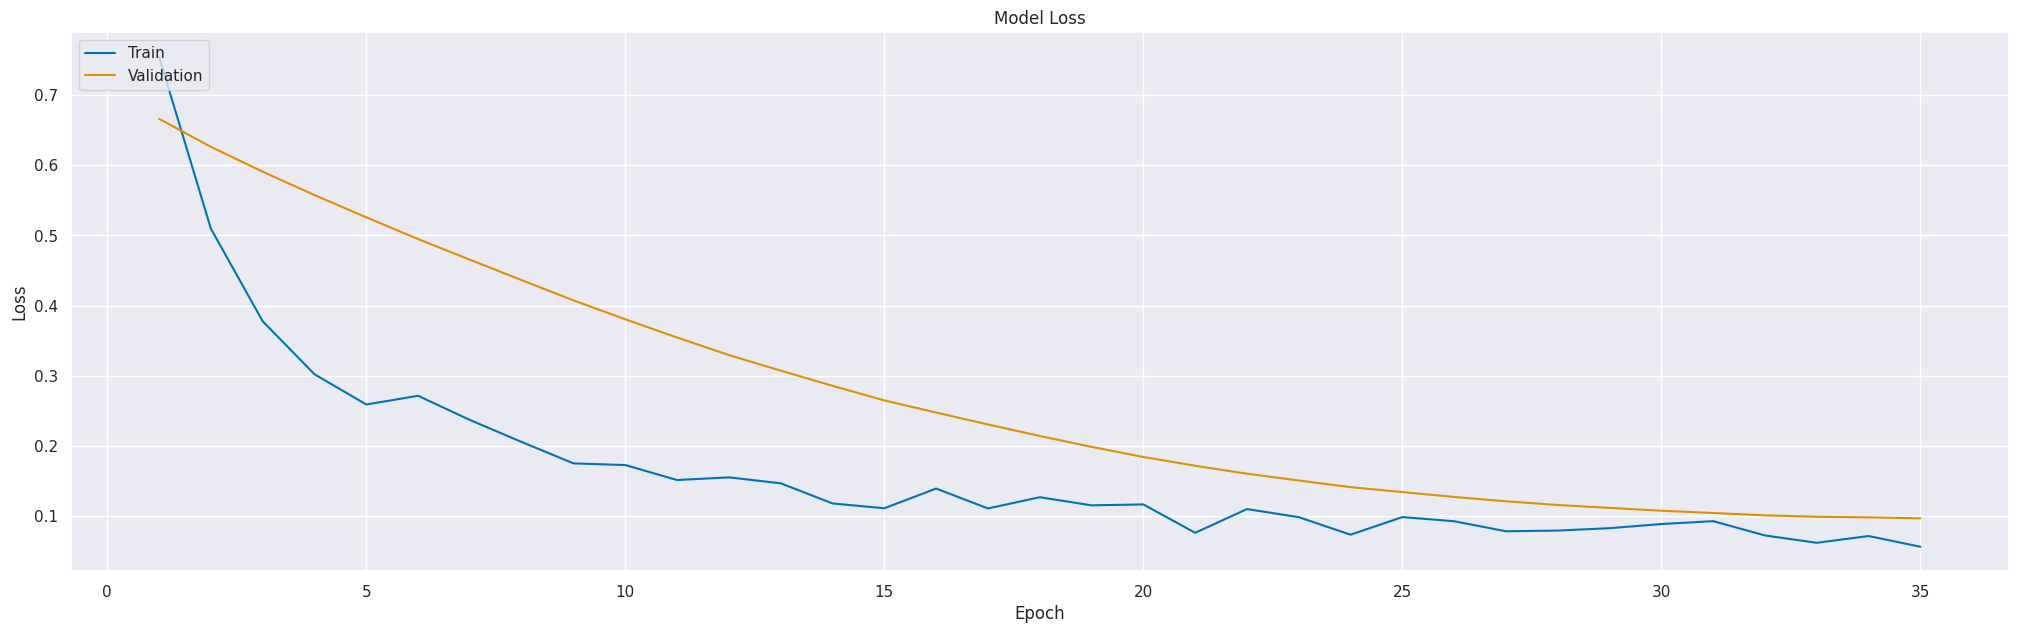

In [90]:
plotLearningCurve(history,35)